In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mplfinance


In [48]:
# Load the dataset
df = pd.read_csv("yahoo_aapl.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-Feb-25,248.00,249.98,244.91,247.04,247.04,"46,872,348"
1,24-Feb-25,244.93,248.86,244.42,247.10,247.10,"51,326,400"
2,21-Feb-25,245.95,248.69,245.22,245.55,245.55,"53,197,400"
3,20-Feb-25,244.94,246.78,244.29,245.83,245.83,"32,316,900"
4,19-Feb-25,244.66,246.01,243.16,244.87,244.87,"32,204,200"


In [49]:
df.shape


(2804, 7)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2804 non-null   object 
 1   Open       2804 non-null   float64
 2   High       2804 non-null   float64
 3   Low        2804 non-null   float64
 4   Close      2804 non-null   float64
 5   Adj Close  2804 non-null   float64
 6   Volume     2804 non-null   object 
dtypes: float64(5), object(2)
memory usage: 153.5+ KB


In [51]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert Volume to numeric
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2804 non-null   datetime64[ns]
 1   Open       2804 non-null   float64       
 2   High       2804 non-null   float64       
 3   Low        2804 non-null   float64       
 4   Close      2804 non-null   float64       
 5   Adj Close  2804 non-null   float64       
 6   Volume     2804 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.5 KB


<ipython-input-51-cade5053f98d>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# Visualization

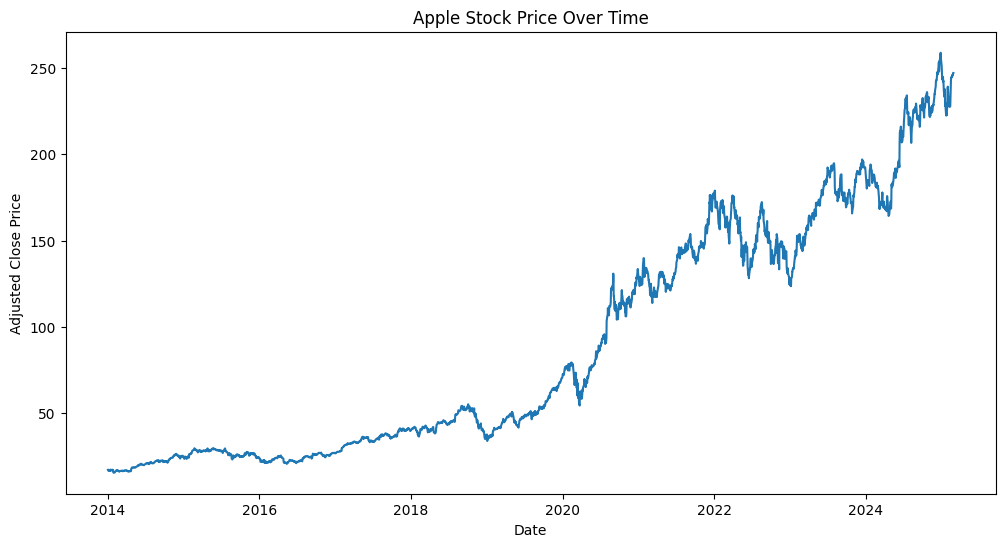

In [52]:
# How does the stock price change over time?
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Adj Close', data=df)
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()


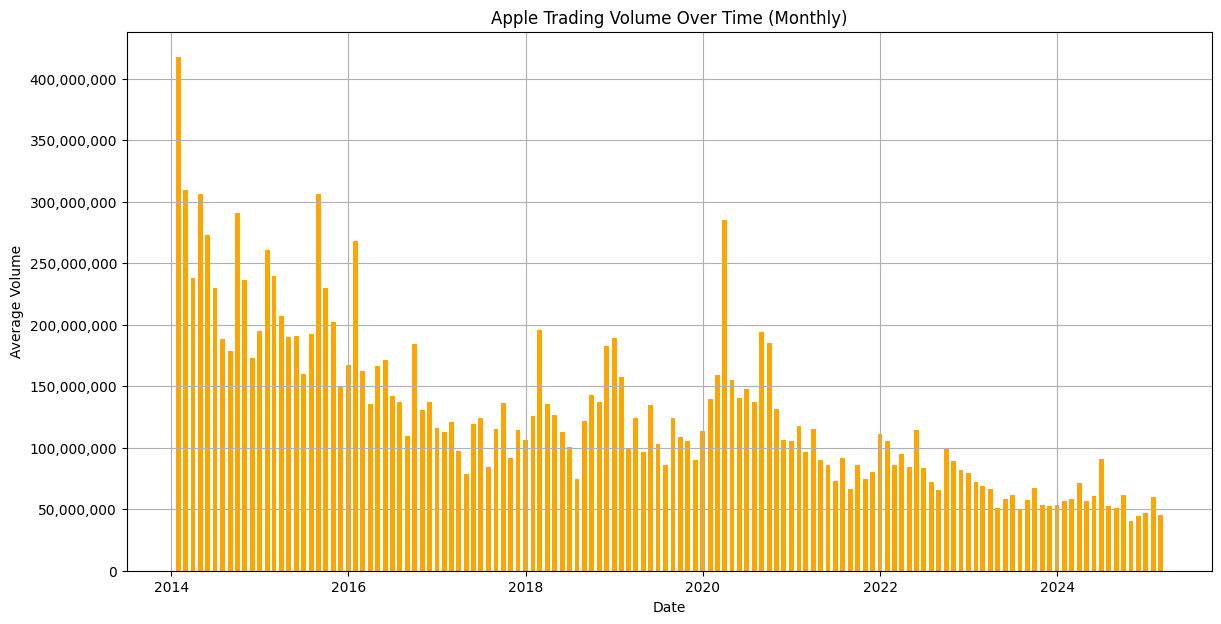

In [54]:
## How does the trading volume change over time?
import matplotlib.ticker as ticker
# Group by Month and calculate the average Volume
monthly_volume = df.resample('ME', on='Date').mean()

# Plot
plt.figure(figsize=(14, 7))
plt.bar(monthly_volume.index, monthly_volume['Volume'], color='orange', width=20)
plt.title('Apple Trading Volume Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis with commas
plt.show()


<ipython-input-55-ced0c0176b85>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




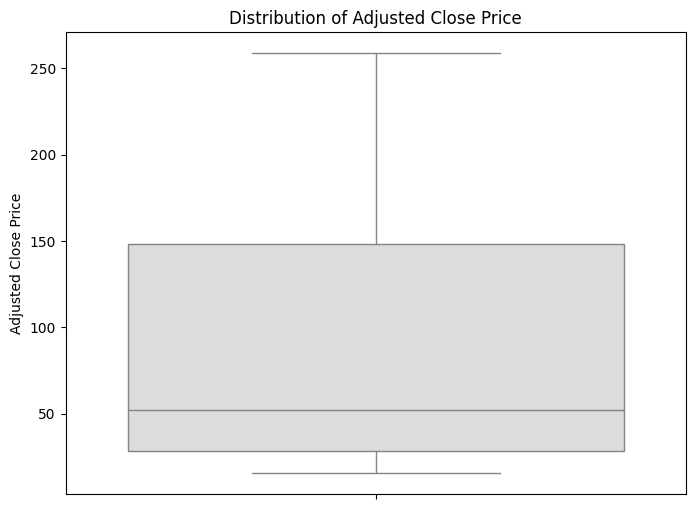

In [55]:
# What was the highest and lowest price?
plt.figure(figsize=(8, 6))
sns.boxplot(y='Adj Close', data=df, palette='coolwarm')
plt.title("Distribution of Adjusted Close Price")
plt.ylabel("Adjusted Close Price")
plt.show()


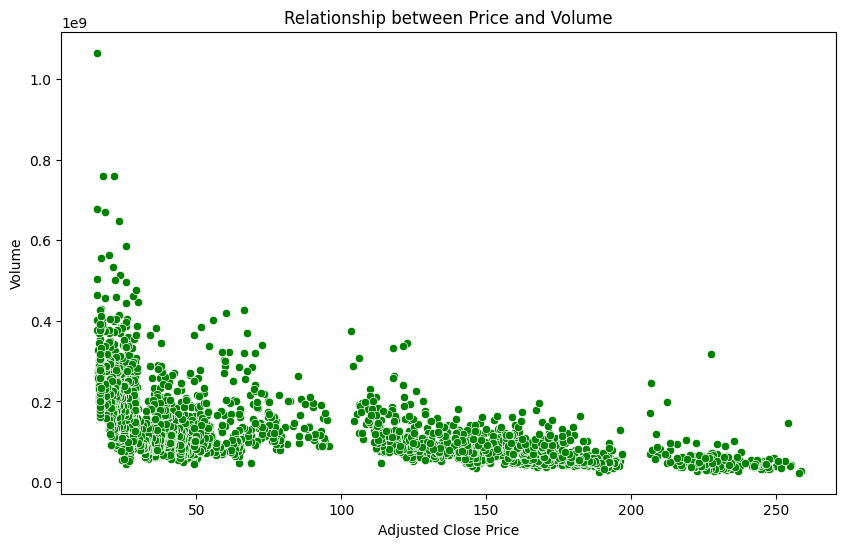

In [56]:
#Is there a relationship between Price and Volume?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', data=df, color='green')
plt.title("Relationship between Price and Volume")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Volume")
plt.show()


<ipython-input-57-6fd96d7bab48>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




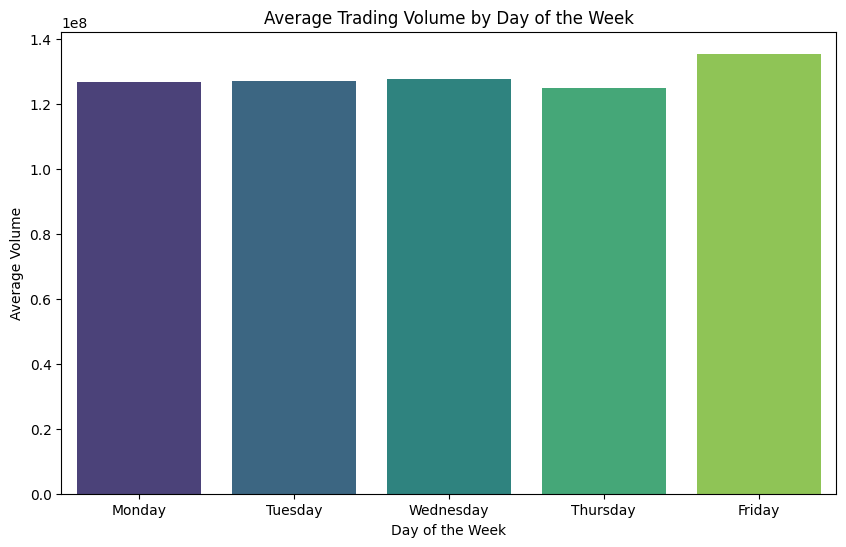

In [57]:
#When were the busiest trading days?

df['DayOfWeek'] = df['Date'].dt.day_name()
volume_by_day = df.groupby('DayOfWeek')['Volume'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_by_day.index, y=volume_by_day.values, palette='viridis')
plt.title("Average Trading Volume by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Volume")
plt.show()


<ipython-input-58-c128f56fd475>:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-58-c128f56fd475>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




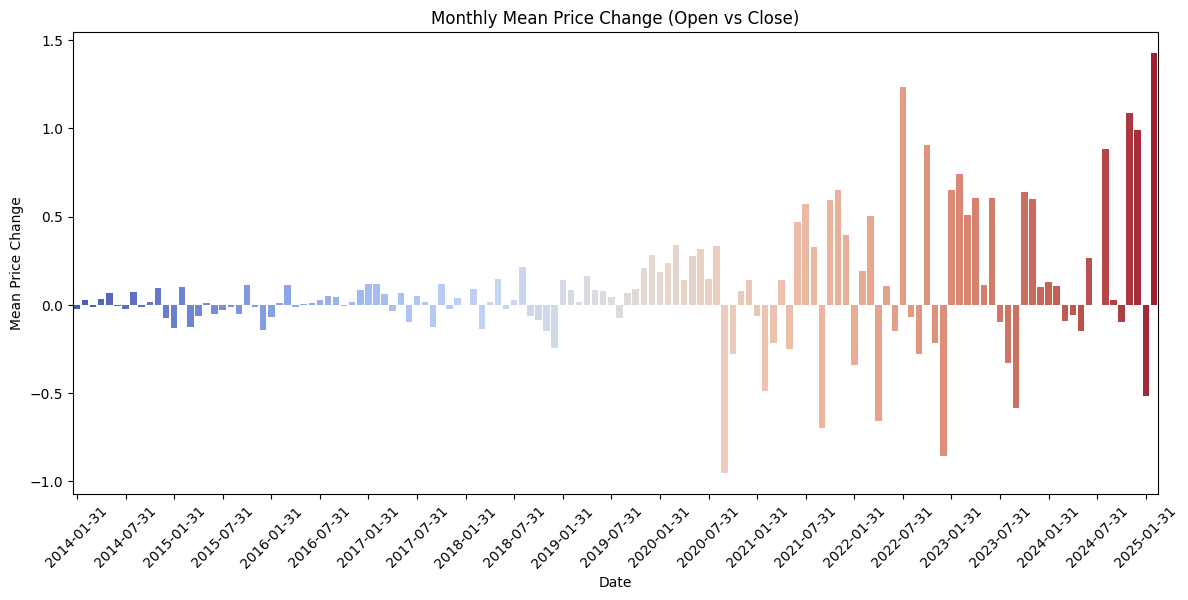

In [58]:
#How much does the stock price change each day?

df['Daily Change'] = df['Close'] - df['Open']
monthly_change = df.resample('M', on='Date')['Daily Change'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='Date', y='Daily Change', data=monthly_change, palette='coolwarm')
plt.title("Monthly Mean Price Change (Open vs Close)")
plt.xlabel("Date")
plt.ylabel("Mean Price Change")
plt.xticks(ticks=plt.xticks()[0][::6], rotation=45)
plt.show()



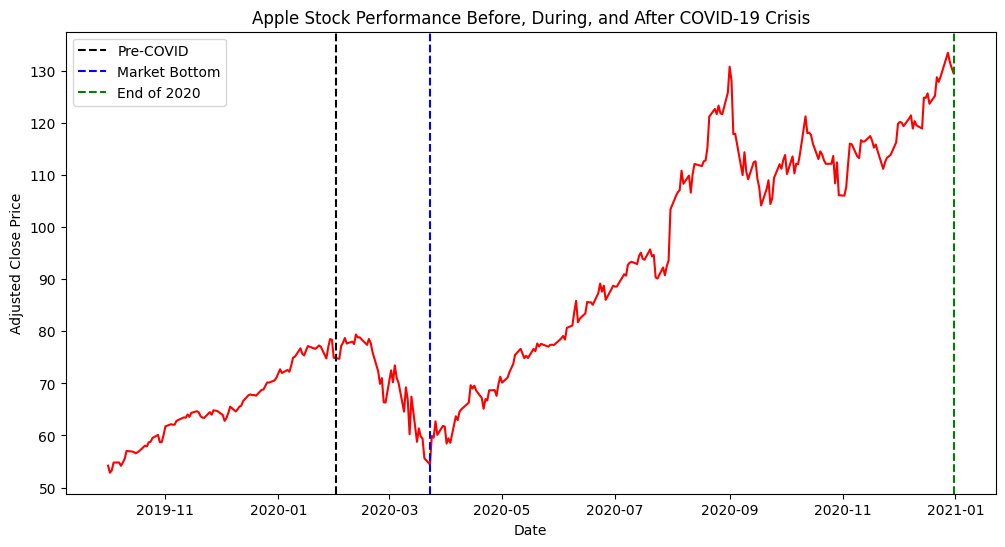

In [59]:
#How did Apple stock perform during the COVID-19 crisis

# Define time frame (Before & After COVID Market Crash)
covid_period_extended = df[(df['Date'] >= '2019-10-01') & (df['Date'] <= '2020-12-31')]

# Plot stock performance over COVID-19 period
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Adj Close', data=covid_period_extended, color='red')
plt.axvline(pd.Timestamp('2020-02-01'), color='black', linestyle='dashed', label='Pre-COVID')
plt.axvline(pd.Timestamp('2020-03-23'), color='blue', linestyle='dashed', label='Market Bottom')
plt.axvline(pd.Timestamp('2020-12-31'), color='green', linestyle='dashed', label='End of 2020')

# plot
plt.title("Apple Stock Performance Before, During, and After COVID-19 Crisis")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()


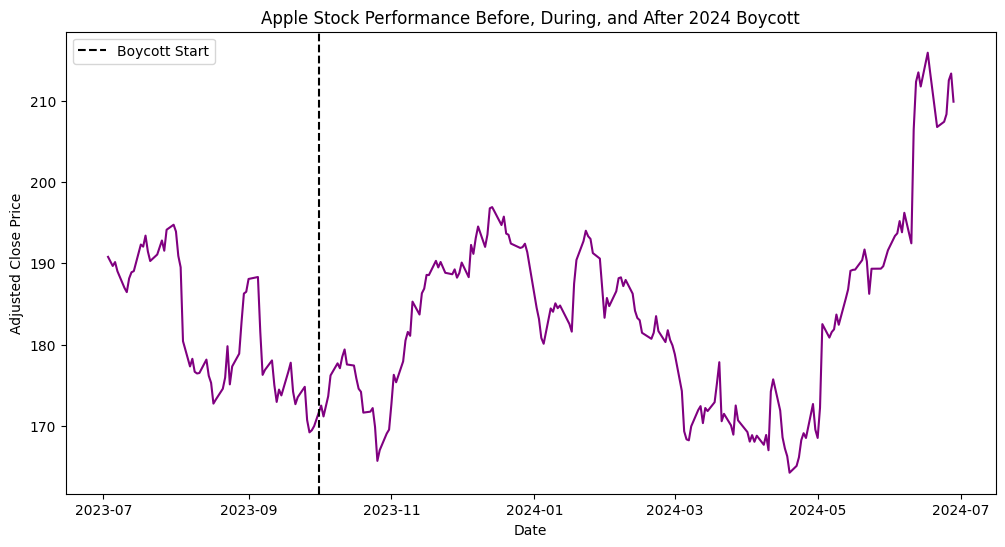

In [60]:
#How did Boycott affect Apple's stock price?

# Define time frame (Before & After the Boycott)
boycott_period_extended = df[(df['Date'] >= '2023-07-01') & (df['Date'] <= '2024-06-30')]

# Plot stock performance over boycott period
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Adj Close', data=boycott_period_extended, color='purple')
plt.axvline(pd.Timestamp('2023-10-01'), color='black', linestyle='dashed', label='Boycott Start')

# plot
plt.title("Apple Stock Performance Before, During, and After 2024 Boycott")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()


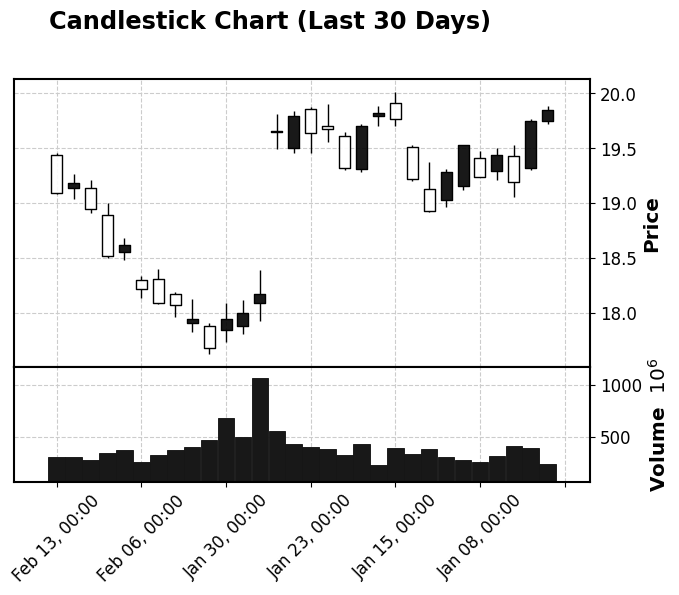

In [64]:
#How did Apple's stock price move in the last 30 days?
import mplfinance as mpf
# Prepare Data for Candlestick Chart
df_candle = df.set_index('Date')  # Set Date as index
df_candle = df_candle[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot Candlestick Chart
mpf.plot(df_candle.tail(30), type='candle', style='classic', title='Candlestick Chart (Last 30 Days)',
         ylabel='Price', volume=True)


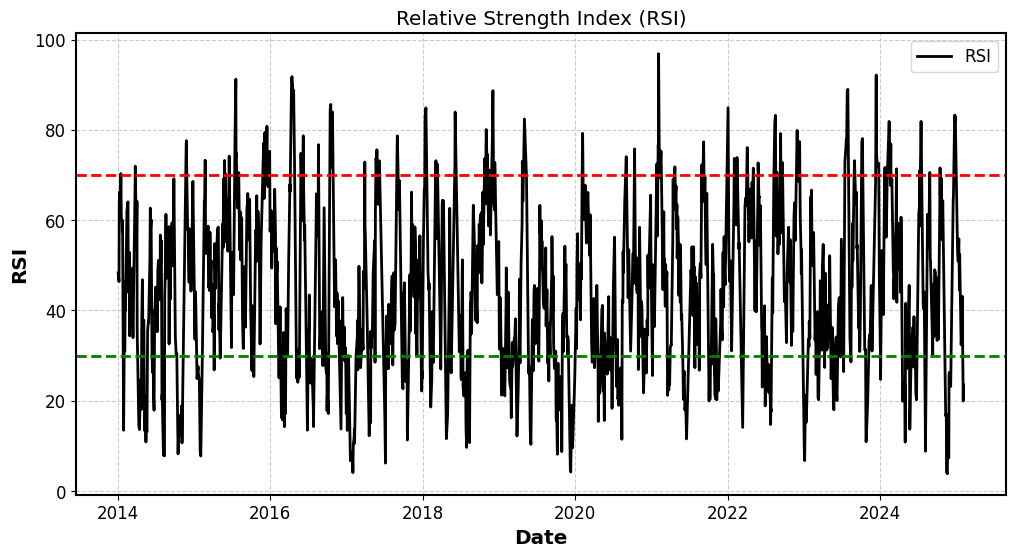

In [65]:
#Is Apple's stock currently overbought or oversold?

def compute_RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = compute_RSI(df['Close'])

# Plot RSI
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['RSI'], label='RSI', color='black')
plt.axhline(70, linestyle='--', color='red')  # Overbought level
plt.axhline(30, linestyle='--', color='green')  # Oversold level
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


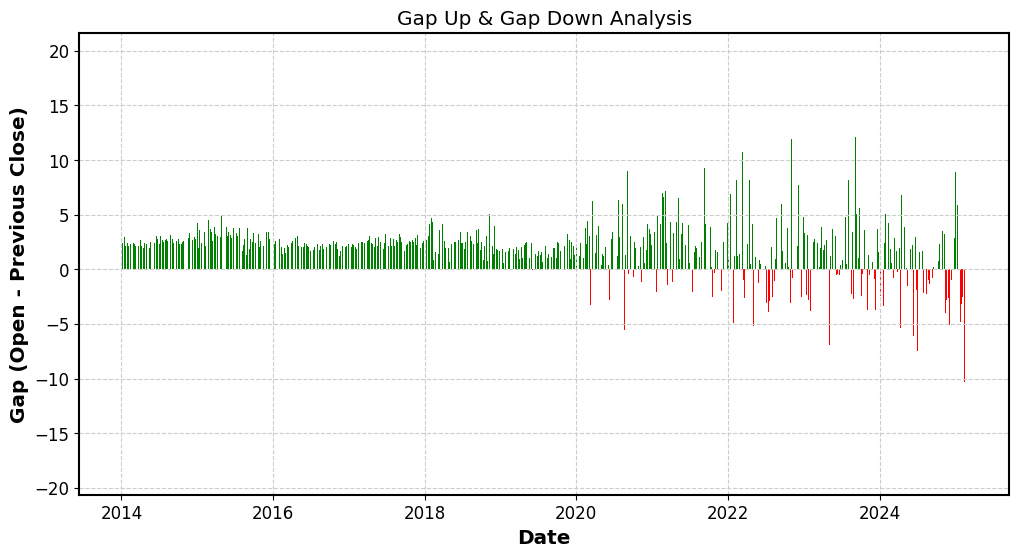

In [66]:
#How often does Apple's stock experience gap-ups or gap-downs?

df['Gap'] = df['Open'] - df['Adj Close'].shift(1)

plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Gap'], color=['red' if x < 0 else 'green' for x in df['Gap']])
plt.xlabel("Date")
plt.ylabel("Gap (Open - Previous Close)")
plt.title("Gap Up & Gap Down Analysis")
plt.show()
